# Data of Crime 2020 (Post COVID-19)

In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
# Read the csv file
file_path = 'RMS_Crime_Incidents.csv'
after_df = pd.read_csv(file_path)
after_df.columns

Index(['X', 'Y', 'crime_id', 'report_number', 'address', 'offense_description',
       'offense_category', 'state_offense_code', 'arrest_charge',
       'charge_description', 'incident_timestamp', 'incident_time',
       'day_of_week', 'hour_of_day', 'year', 'scout_car_area', 'precinct',
       'block_id', 'neighborhood', 'council_district', 'zip_code', 'longitude',
       'latitude', 'oid'],
      dtype='object')

In [3]:
# Filter the data to the columns wanted
crime_data = after_df[['offense_category', 'charge_description','day_of_week', 'year']]
crime_data

,offense_category,charge_description,day_of_week,year
0,SEXUAL ASSAULT,CSC 3RD DEGREE - OBJECT,5,2020
1,SEX OFFENSES,CSC 2ND DEGREE - FORCIBLE CONTACT,2,2020
2,SEX OFFENSES,CSC 2ND DEGREE - FORCIBLE CONTACT,7,2020
3,SEX OFFENSES,CSC 2ND DEGREE - FORCIBLE CONTACT,1,2020
4,SEX OFFENSES,CSC 2ND DEGREE - FORCIBLE CONTACT,2,2020
...,...,...,...,...
19585,OUIL,"ACCIDENT, HIT & RUN",2,2020
19586,OTHER,HEALTH AND SAFETY,2,2020
19587,OTHER,HEALTH AND SAFETY,5,2020
19588,OTHER,HEALTH AND SAFETY,7,2020


In [4]:
# Grabbing only data on 2020
data_2020 = crime_data.loc[crime_data['year'] == 2020]
data_2020

,offense_category,charge_description,day_of_week,year
0,SEXUAL ASSAULT,CSC 3RD DEGREE - OBJECT,5,2020
1,SEX OFFENSES,CSC 2ND DEGREE - FORCIBLE CONTACT,2,2020
2,SEX OFFENSES,CSC 2ND DEGREE - FORCIBLE CONTACT,7,2020
3,SEX OFFENSES,CSC 2ND DEGREE - FORCIBLE CONTACT,1,2020
4,SEX OFFENSES,CSC 2ND DEGREE - FORCIBLE CONTACT,2,2020
...,...,...,...,...
19585,OUIL,"ACCIDENT, HIT & RUN",2,2020
19586,OTHER,HEALTH AND SAFETY,2,2020
19587,OTHER,HEALTH AND SAFETY,5,2020
19588,OTHER,HEALTH AND SAFETY,7,2020


In [5]:
# Pulling up the unique names for the types of crimes to sort it
data_2020['offense_category'].unique()
# Murder = homicide
# Rape = sexual assault, sex offenses
# Robbery = robbery, extortion
# Assault = assault, aggravated assault
# Burglary = burglary
# Larceny = fraud, larceny, stolen property
# Motor vehicle theft = stolen vehicle
# Domestic violence = family offense

array(['SEXUAL ASSAULT', 'SEX OFFENSES', 'ASSAULT', 'FRAUD', 'ARSON',
       'OUIL', 'HOMICIDE', 'KIDNAPPING', 'AGGRAVATED ASSAULT', 'BURGLARY',
       'LARCENY', 'STOLEN VEHICLE', 'STOLEN PROPERTY',
       'DAMAGE TO PROPERTY', 'DANGEROUS DRUGS', 'FAMILY OFFENSE',
       'LIQUOR', 'WEAPONS OFFENSES', 'DISORDERLY CONDUCT', 'OTHER',
       'RUNAWAY', 'MISCELLANEOUS', 'ROBBERY', 'EXTORTION', 'FORGERY',
       'OBSTRUCTING THE POLICE', 'OBSTRUCTING JUDICIARY', 'SOLICITATION'],
      dtype=object)

In [6]:
# Cleaning it to have only the types of crime wanted
cleaned_df = data_2020.loc[(crime_data['offense_category'] == 'SEXUAL ASSAULT')
              |
              (crime_data['offense_category'] == 'SEX OFFENSES')
              |
              (crime_data['offense_category'] == 'ASSAULT')
              |
              (crime_data['offense_category'] == 'FRAUD')
              |
              (crime_data['offense_category'] == 'HOMICIDE')
              |
              (crime_data['offense_category'] == 'AGGRAVATED ASSAULT')
              |
              (crime_data['offense_category'] == 'BURGLARY')
              |
              (crime_data['offense_category'] == 'LARCENY')
              |
              (crime_data['offense_category'] == 'STOLEN VEHICLE')
              |
              (crime_data['offense_category'] == 'STOLEN PROPERTY')
              |
              (crime_data['offense_category'] == 'FAMILY OFFENSE')
              |
              (crime_data['offense_category'] == 'ROBBERY')
              |
              (crime_data['offense_category'] == 'EXTORTION')]
cleaned_df.head()

,offense_category,charge_description,day_of_week,year
0,SEXUAL ASSAULT,CSC 3RD DEGREE - OBJECT,5,2020
1,SEX OFFENSES,CSC 2ND DEGREE - FORCIBLE CONTACT,2,2020
2,SEX OFFENSES,CSC 2ND DEGREE - FORCIBLE CONTACT,7,2020
3,SEX OFFENSES,CSC 2ND DEGREE - FORCIBLE CONTACT,1,2020
4,SEX OFFENSES,CSC 2ND DEGREE - FORCIBLE CONTACT,2,2020


In [7]:
# Separating the data to each category wanted
murder_data = cleaned_df.loc[cleaned_df['offense_category'] == 'HOMICIDE']
rape_data = cleaned_df.loc[(cleaned_df['offense_category'] == 'SEXUAL ASSAULT')
                          |
                          (cleaned_df['offense_category'] == 'SEX OFFENSES')]
robbery_data = cleaned_df.loc[(cleaned_df['offense_category'] == 'ROBBERY')
                             |
                             (cleaned_df['offense_category'] == 'EXTORTION')]
assault_data = cleaned_df.loc[(cleaned_df['offense_category'] == 'ASSAULT')
                             |
                             (cleaned_df['offense_category'] == 'AGGRAVATED ASSAULT')]
burglary_data = cleaned_df.loc[cleaned_df['offense_category'] == 'BURGLARY']
larceny_data = cleaned_df.loc[(cleaned_df['offense_category'] == 'FRAUD')
                             |
                             (cleaned_df['offense_category'] == 'LARCENY')
                             |
                             (cleaned_df['offense_category'] == 'STOLEN PROPERTY')]
motor_theft_data = cleaned_df.loc[cleaned_df['offense_category'] == 'STOLEN VEHICLE']
dom_violence_data = cleaned_df.loc[cleaned_df['offense_category'] == 'FAMILY OFFENSE']

In [8]:
# Count of each type of crime
murder_count = len(murder_data)
rape_count = len(rape_data)
robbery_count = len(robbery_data)
assault_count = len(assault_data)
burglary_count = len(burglary_data)
larceny_count = len(larceny_data)
motor_count = len(motor_theft_data)
dom_violence_count = len(dom_violence_data)
print(murder_count)
print(rape_count)
print(robbery_count)
print(assault_count)
print(burglary_count)
print(larceny_count)
print(motor_count)
print(dom_violence_count)

54
370
558
6011
1480
4725
1651
160


In [9]:
# Total Violence
total_jan = cleaned_df.loc[(cleaned_df['day_of_week'] >=1)
               &
               (cleaned_df['day_of_week'] <=4)]

total_feb = cleaned_df.loc[(cleaned_df['day_of_week'] >=5)
               &
               (cleaned_df['day_of_week'] <=8)]
total_jan.head()

,offense_category,charge_description,day_of_week,year
1,SEX OFFENSES,CSC 2ND DEGREE - FORCIBLE CONTACT,2,2020
3,SEX OFFENSES,CSC 2ND DEGREE - FORCIBLE CONTACT,1,2020
4,SEX OFFENSES,CSC 2ND DEGREE - FORCIBLE CONTACT,2,2020
8,SEX OFFENSES,CSC 2ND DEGREE - FORCIBLE CONTACT,3,2020
10,SEX OFFENSES,CSC 2ND DEGREE - FORCIBLE CONTACT,3,2020


In [35]:
# Total Violence Count
total_jan_count = len(total_jan)
total_feb_count = len(total_feb)
print(total_jan_count)
print(total_feb_count)

8563
6446


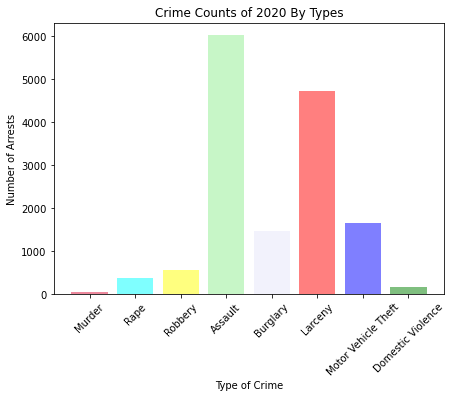

In [36]:
# Bar Graph
crime_types = ["Murder","Rape","Robbery","Assault","Burglary","Larceny","Motor Vehicle Theft","Domestic Violence"]
counts = [murder_count, rape_count, robbery_count, assault_count, burglary_count, larceny_count, motor_count, dom_violence_count]
x_axis = np.arange(len(crime_types))
color = ['crimson','cyan','yellow','lightgreen','lavender','red','blue','green']

plt.figure(figsize=(7,5))

tick_locations = [value for value in x_axis]
plt.xticks(x_axis, crime_types, rotation="45")

plt.bar(x_axis, counts, color=color, alpha=0.5)

plt.title("Crime Counts of 2020 By Types")
plt.xlabel("Type of Crime")
plt.ylabel("Number of Arrests")

plt.savefig("Crime Counts 2020")
plt.show()

In [37]:
# Total of 2020
total_2020 = total_jan_count + total_feb_count
total_2020

15009

# Data of Crime 2018 (Pre-COVID-19)

In [12]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import csv
from pprint import pprint

In [14]:
# Read the csv files
total_data = pd.read_csv('Michigan 2018 Crime Data Total.csv')
dv_data = pd.read_csv('Domestic Violence Total.csv')

In [15]:
# Display the data
total_data.head()

,2018,January,February,March,April,May,June,July,August,September,October,November,December
0,Murder,48,48,38,46,48,41,38,65,49,49,40,40
1,Rape Total,683,587,638,656,652,641,709,654,665,667,552,504
2,Robbery Total,454,368,388,425,455,528,559,541,518,2641,455,473
3,Assault,2190,1916,2315,2524,2965,2922,2948,3046,2799,2589,2307,2536
4,Burglary,2510,1955,2249,2403,2667,2797,3063,2977,2858,2641,2468,2574


In [16]:
# Fill the NaN with 0's
total_no_nan = total_data.fillna(0)
total_no_nan

,2018,January,February,March,April,May,June,July,August,September,October,November,December
0,Murder,48,48,38,46,48,41,38,65,49,49,40,40
1,Rape Total,683,587,638,656,652,641,709,654,665,667,552,504
2,Robbery Total,454,368,388,425,455,528,559,541,518,2641,455,473
3,Assault,2190,1916,2315,2524,2965,2922,2948,3046,2799,2589,2307,2536
4,Burglary,2510,1955,2249,2403,2667,2797,3063,2977,2858,2641,2468,2574
5,Larceny Total,9080,7443,8568,8797,10319,10703,11499,11593,10735,10410,8810,9031
6,Motor Vehicle Theft,1396,1160,1381,1288,1542,1536,1733,1631,1576,1443,1355,1417


In [17]:
# Display the data
dv_data.head()

,Unnamed: 0,Total
0,Domestic Violence,18582


In [18]:
# Pulling up a unique list of the column to only use the total rows
total_no_nan['2018'].unique()

array(['Murder', 'Rape Total', 'Robbery Total', 'Assault', 'Burglary',
       'Larceny Total', 'Motor Vehicle Theft'], dtype=object)

In [19]:
# Getting only the January and February to compare
total_df = total_no_nan[['2018','January','February']]
total_df

,2018,January,February
0,Murder,48,48
1,Rape Total,683,587
2,Robbery Total,454,368
3,Assault,2190,1916
4,Burglary,2510,1955
5,Larceny Total,9080,7443
6,Motor Vehicle Theft,1396,1160


In [20]:
# Getting sum of each month
total_sum = total_df.sum()
jan_sum = total_sum[1]
feb_sum = total_sum[2]
print(jan_sum)
print(feb_sum)

16361
13477


In [21]:
# Total of 2018
total_2018 = jan_sum + jan_sum
total_2018

32722

In [22]:
# Deleting the 2018 column and adding a total column to do a sum of both months
del total_df["2018"]
total_df["Total"] = ""

C:\Users\jana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
# Checking if the code above worked
total_df

,January,February,Total
0,48,48,
1,683,587,
2,454,368,
3,2190,1916,
4,2510,1955,
5,9080,7443,
6,1396,1160,


In [24]:
# Adding the rows together
total_row = total_df.sum(axis=1)
total_row

0       96
1     1270
2      822
3     4106
4     4465
5    16523
6     2556
dtype: int64

In [25]:
total_df["Total"] = total_row
total_df

C:\Users\jana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,January,February,Total
0,48,48,96
1,683,587,1270
2,454,368,822
3,2190,1916,4106
4,2510,1955,4465
5,9080,7443,16523
6,1396,1160,2556


In [26]:
# Getting the sum of each type of crime
murder_sum = total_df['Total'][0]
rape_sum = total_df['Total'][1]
robbery_sum = total_df['Total'][2]
assault_sum = total_df['Total'][3]
burglary_sum = total_df['Total'][4]
larceny_sum = total_df['Total'][5]
motor_sum = total_df['Total'][6]
print(murder_sum)
print(rape_sum)
print(robbery_sum)
print(assault_sum)
print(burglary_sum)
print(larceny_sum)
print(motor_sum)

96
1270
822
4106
4465
16523
2556


In [27]:
# Storing sums of each gender for domestic violence
dv_sum = dv_data["Total"][0]
dv_sum

18582

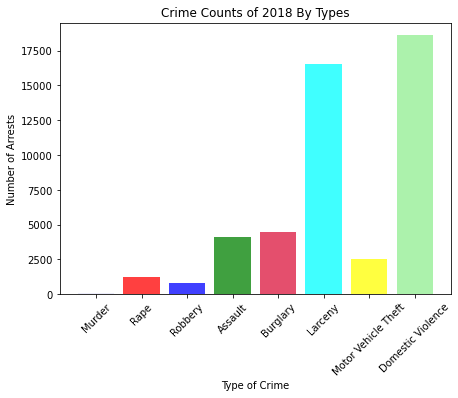

In [28]:
# Bar Graph
crime_types = ["Murder","Rape","Robbery","Assault","Burglary","Larceny","Motor Vehicle Theft","Domestic Violence"]
counts = [murder_sum, rape_sum, robbery_sum, assault_sum, burglary_sum, larceny_sum, motor_sum, dv_sum]
x_axis = np.arange(len(crime_types))
color = ['lavender','red','blue','green','crimson','cyan','yellow','lightgreen']

plt.figure(figsize=(7,5))

tick_locations = [value for value in x_axis]
plt.xticks(x_axis, crime_types, rotation="45")


plt.bar(x_axis, counts, color=color, alpha=0.75)

plt.title("Crime Counts of 2018 By Types")
plt.xlabel("Type of Crime")
plt.ylabel("Number of Arrests")

plt.savefig("Crime Counts 2018")
plt.show()

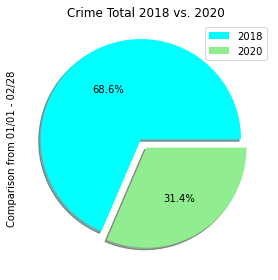

In [34]:
# Total Comparison
years = ["2018", "2020"]
totals = [total_2018, total_2020]
explode = [0.1,0]

plt.pie(totals, colors=['cyan', 'lightgreen'], explode=explode, shadow=True, autopct="%1.1f%%")
plt.legend(labels=years, loc="upper right")
plt.title("Crime Total 2018 vs. 2020")
plt.ylabel("Comparison from 01/01 - 02/28")

plt.tight_layout()
plt.savefig("Crime Total 2018 vs 2020")
plt.show()